In [25]:
%pip install wbdata

import wbdata
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [26]:
wbdata.get_countries()

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

In [27]:
%pip install wbdata
%pip install pandas
%pip install iso3166
%pip install cufflinks
%pip install eep153_tools
%pip install plotly

import wbdata
import pandas as pd
import math
import iso3166
import plotly.offline as py
from scipy.optimize import newton
import plotly.graph_objs as go
import numpy as np
import cufflinks as cf
from matplotlib import animation as ani
cf.go_offline()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


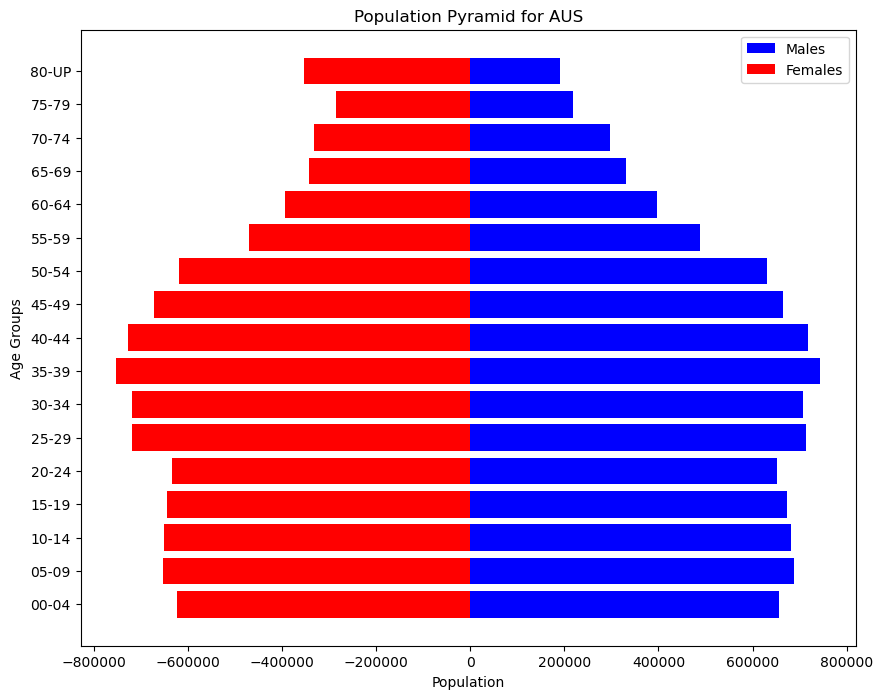

In [28]:
import wbdata  # Import World Bank data API
import matplotlib.pyplot as plt  # For plotting

# Function to retrieve population data from World Bank
def get_population_data(year, variables, gender, place_code):
    population_data = wbdata.get_dataframe(variables, country=place_code)
    population_data.index = population_data.index.astype(int)
    population_data.reset_index(inplace=True)
    population_data = population_data[population_data['date'] == year].melt(
        id_vars=["date"], var_name="age", value_name=gender
    )
    # Add place code 
    population_data['place'] = place_code
    population_data.set_index(['place', 'date'], inplace=True)
    return population_data

# Create five-year age groups
def age_list(age_range):
    def round_age(age_range):
        for i in range(0, 2):
            if 0 < age_range[i] % 5 < 3:
                age_range[i] -= age_range[i] % 5
            elif age_range[i] % 5 >= 3:
                age_range[i] += (5 - age_range[i] % 5)
        return age_range

    results = []
    age_lb, age_ub = round_age(age_range)
    while age_lb < min(79, age_ub):
        results.append("{:02d}{:02d}".format(age_lb, age_lb + 4))
        age_lb += 5
    if age_lb >= 80:
        results.append('80UP')
    return results

# Function to create a population DataFrame
def population_df(year=2000, sex='all', age_range=(0, 80), place_code='WLD'):
    age_ranges = age_list(age_range)
    male_variables = {"SP.POP." + i + ".MA": "{}-{}".format(i[:2], i[2:]) for i in age_ranges}
    female_variables = {"SP.POP." + i + ".FE": "{}-{}".format(i[:2], i[2:]) for i in age_ranges}
    
    male_population = get_population_data(year, male_variables, 'male', place_code)
    female_population = get_population_data(year, female_variables, 'female', place_code)
    
    # Merge data based on selected sex
    if sex == 'male':
        df = male_population
    elif sex == 'female':
        df = female_population
    else:
        # Combine male and female data for total population
        df = male_population.merge(female_population, on="age").set_axis(male_population.index)
        df["total"] = df["female"] + df["male"]
    
    return df

# Function to plot a population pyramid
def plot_population_pyramid(df, place):
    # Plotting population pyramid
    age_groups = df['age']
    fig, ax = plt.subplots(figsize=(10, 8))
    # Horizontal bar plot for males (positive) and females (negative)
    ax.barh(age_groups, df['male'], color='blue', label='Males')
    ax.barh(age_groups, -df['female'], color='red', label='Females')
    ax.set_xlabel('Population')
    ax.set_ylabel('Age Groups')
    ax.set_title(f'Population Pyramid for {place}')
    ax.legend()
    plt.show()

# Example usage
world_pop = population_df(year=2000, sex='all', age_range=(0, 80), place_code='AUS')
plot_population_pyramid(world_pop, 'AUS')


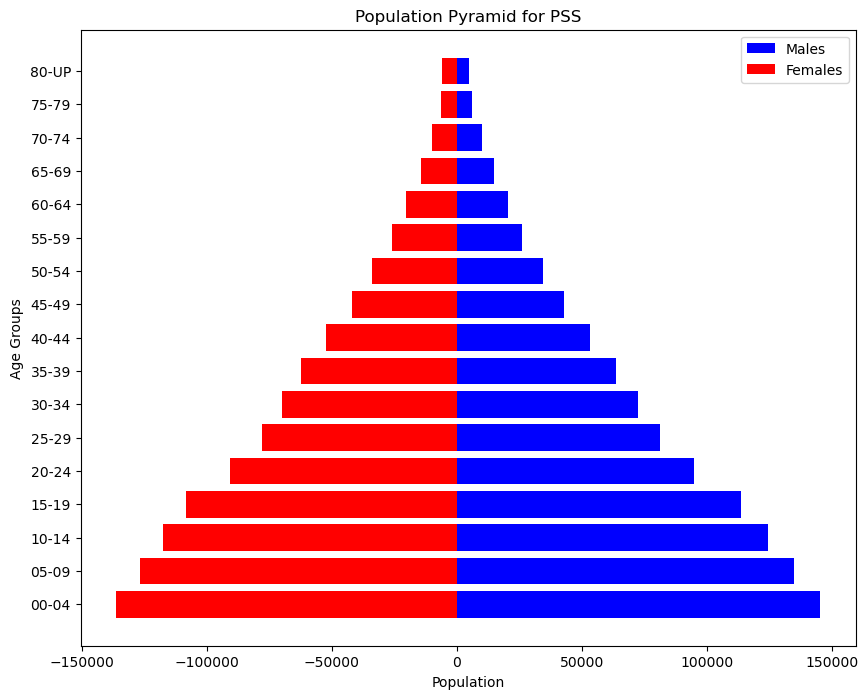

In [29]:
world_pop = population_df(year=2000, sex='all', age_range=(0, 80), place_code='PSS')
plot_population_pyramid(world_pop, 'PSS')

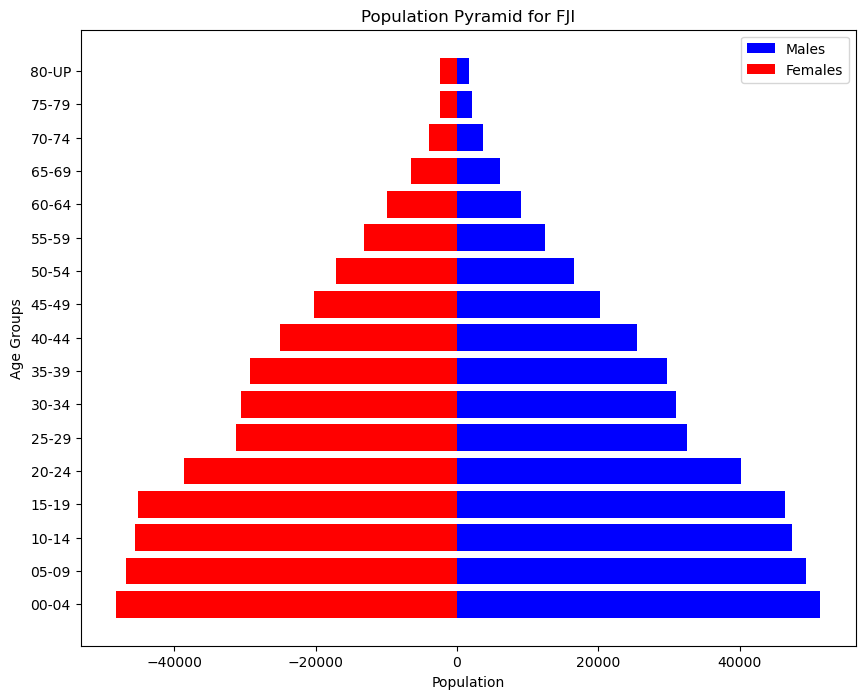

In [30]:
world_pop = population_df(year=2000, sex='all', age_range=(0, 80), place_code='FJI')
plot_population_pyramid(world_pop, 'FJI')

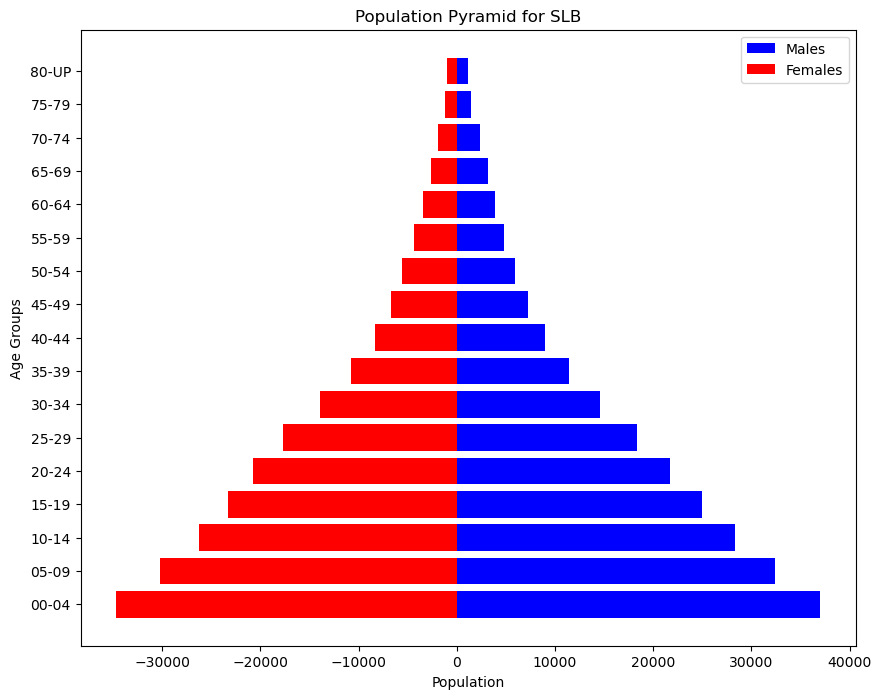

In [36]:
world_pop = population_df(year=2000, sex='all', age_range=(0, 80), place_code='SLB')
plot_population_pyramid(world_pop, 'SLB')

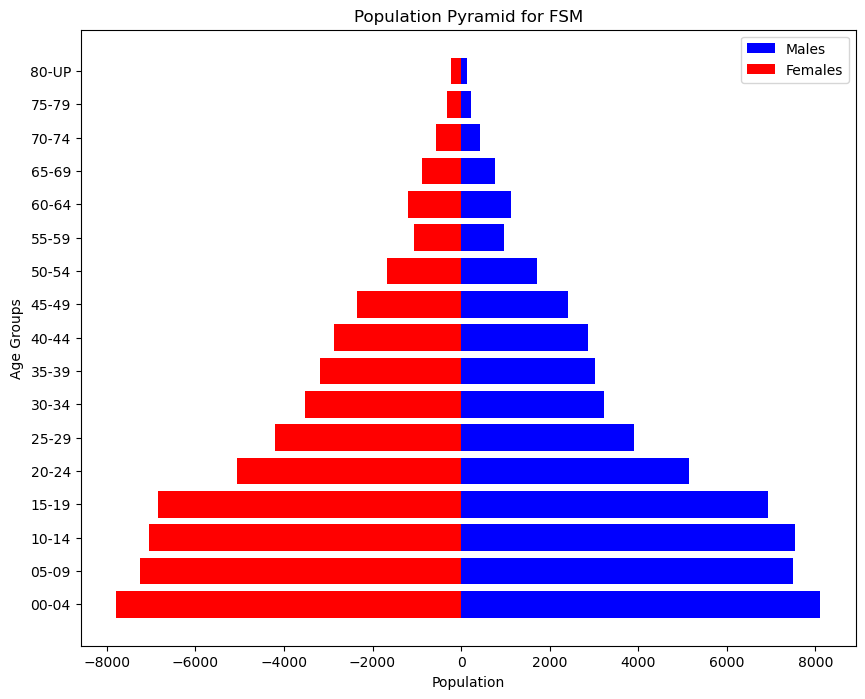

In [32]:
world_pop = population_df(year=2000, sex='all', age_range=(0, 80), place_code='FSM')
plot_population_pyramid(world_pop, 'FSM')

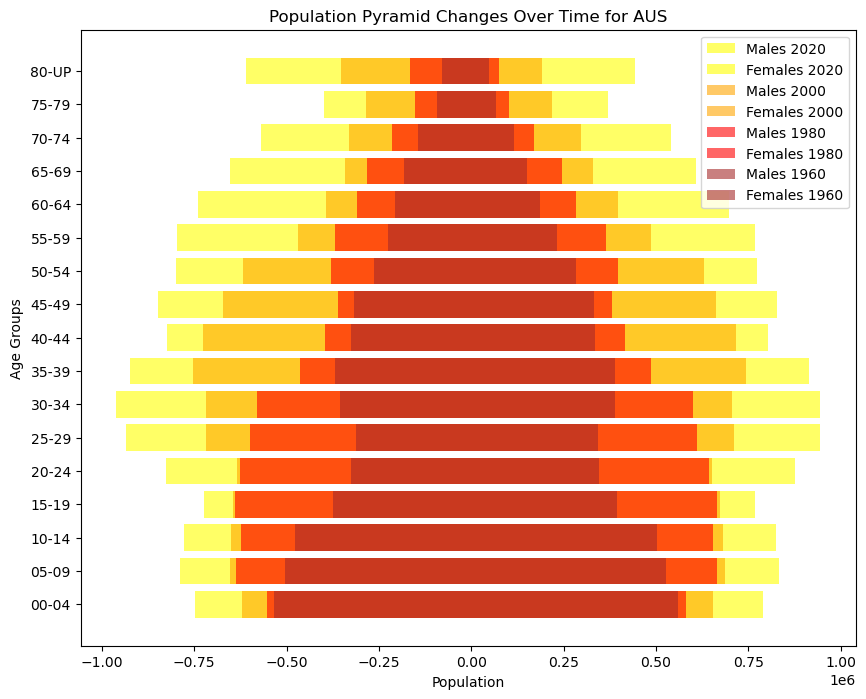

In [95]:
def plot_population_pyramid_over_time(years, place_code):
    """Plot population pyramids for multiple years on a single graph using Matplotlib."""
    fig, ax = plt.subplots(figsize=(10, 8))

    colors = ['yellow', 'orange', 'red', 'brown']
    for i, year in enumerate(years):
       
        df = population_df(year=year, sex='all', age_range=(0, 80), place_code=place_code)

        # age groups
        age_groups = df['age']

        # Plot males (positive values)
        ax.barh(age_groups, df['male'], color=colors[i], alpha=0.6, label=f'Males {year}')

        # Plot females (negative values)
        ax.barh(age_groups, -df['female'], color=colors[i], alpha=0.6, label=f'Females {year}')

    # labels and titles
    ax.set_xlabel('Population')
    ax.set_ylabel('Age Groups')
    ax.set_title(f'Population Pyramid Changes Over Time for {place_code}')
    ax.legend()

    plt.show()

    return ax

# Define years to visualize
years = [2020, 2000, 1980, 1960]

# Generate population pyramids for Australia over time
ax = plot_population_pyramid_over_time(years, 'AUS')


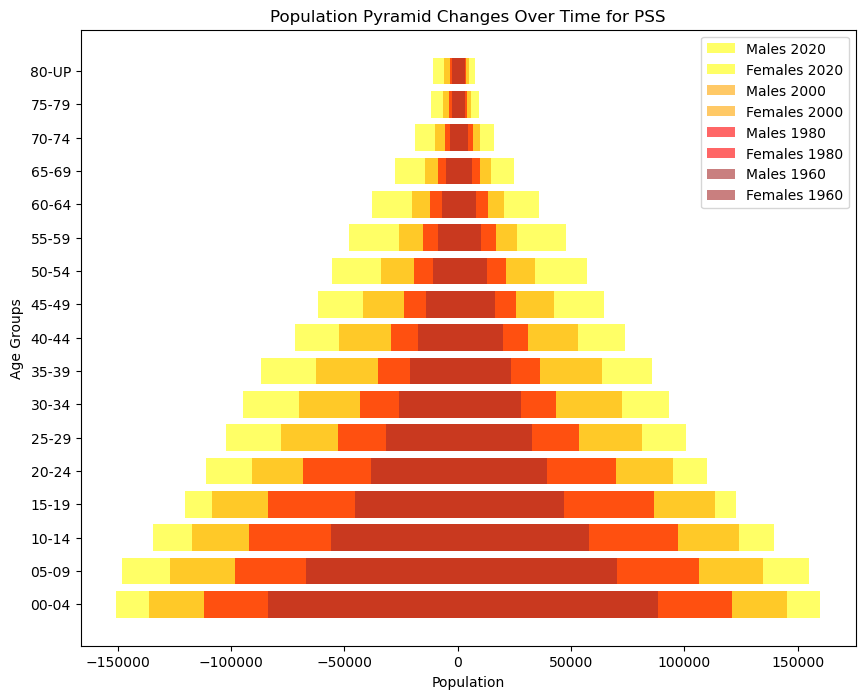

<Axes: title={'center': 'Population Pyramid Changes Over Time for PSS'}, xlabel='Population', ylabel='Age Groups'>

In [92]:
plot_population_pyramid_over_time(years, 'PSS')

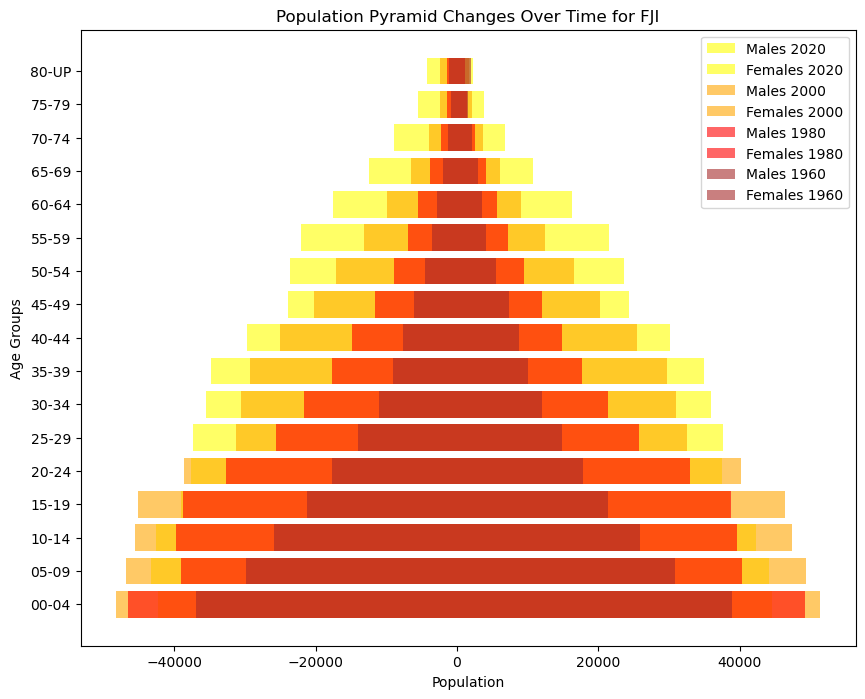

<Axes: title={'center': 'Population Pyramid Changes Over Time for FJI'}, xlabel='Population', ylabel='Age Groups'>

In [94]:
plot_population_pyramid_over_time(years, 'FJI')

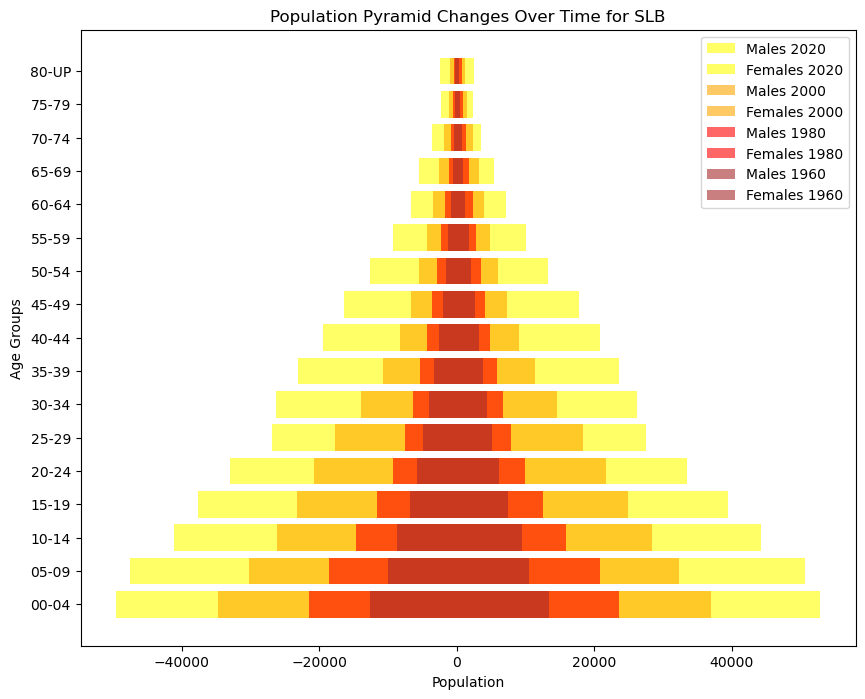

<Axes: title={'center': 'Population Pyramid Changes Over Time for SLB'}, xlabel='Population', ylabel='Age Groups'>

In [93]:
plot_population_pyramid_over_time(years, 'SLB')

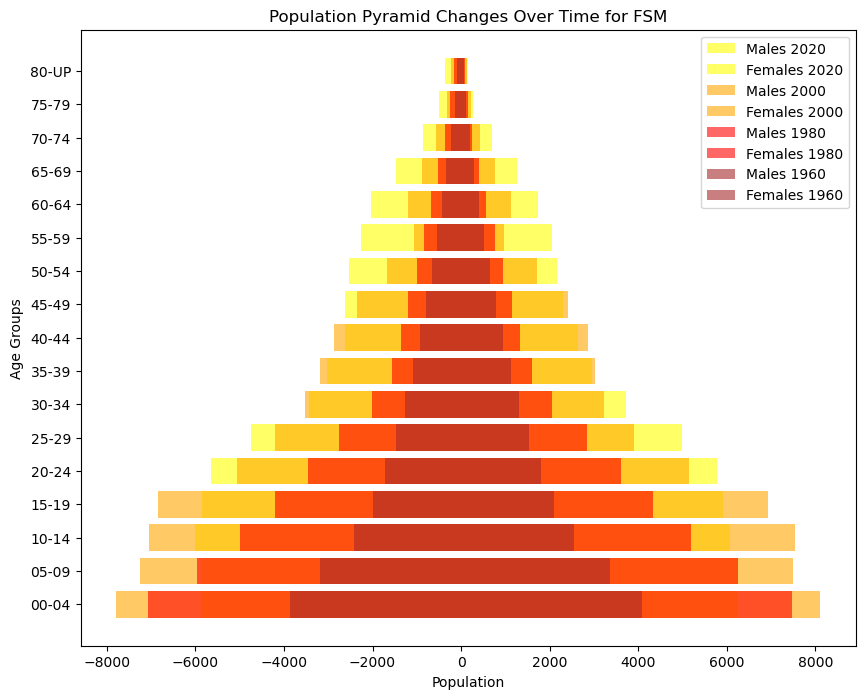

<Axes: title={'center': 'Population Pyramid Changes Over Time for FSM'}, xlabel='Population', ylabel='Age Groups'>

In [91]:
plot_population_pyramid_over_time(years, 'FSM')